In [30]:
import csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
ps = pd.read_csv('patch_seq_log_mouse.csv')

In [3]:
ps = ps[["Date", "File", "Post patch?", "Time spent extracting cytosol", "patch duration", ">400", "SM_QC_PF", "Bad dates"]]
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='coerce')
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration", "SM_QC_PF"], inplace = True)
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Post patch?"] = ps["Post patch?"].astype("category")
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
ps[">400"] = pd.to_numeric(ps[">400"].str.replace(' ',''), errors ='force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
29,2016-04-07,Ndnf - kjh_160407_03,Nucleated patch,5.0,8.0,96.00,pass
30,2016-04-07,Ndnf - kjh_160407_04,Partial-Nucleus,5.0,7.0,111.00,pass
31,2016-04-07,Ndnf - kjh_160407_05,Entire-Cell?,5.0,7.0,27.30,fail
32,2016-04-07,Ndnf - kjh_160407_06,Outside-Out,5.0,7.0,18.76,fail
33,2016-04-07,Ndnf - kjh_160407_07,Outside-Out,2.0,4.0,100.00,pass


In [4]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 29 to 5676
Data columns (total 7 columns):
Date                             2004 non-null datetime64[ns]
File                             2003 non-null object
Post patch?                      2004 non-null category
Time spent extracting cytosol    2004 non-null float64
patch duration                   1992 non-null float64
>400                             1997 non-null float64
SM_QC_PF                         2004 non-null category
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 98.0+ KB


In [5]:
ps = ps[ps["Date"] >= "2017-01-01"]
ps.head()

,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass
3154,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.02,Outside-Out,2.333333,12.533333,98.0,fail
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass


In [38]:
ps["Time spent extracting cytosol"].value_counts()

2.000000    39
2.100000    29
2.083333    27
2.150000    24
2.133333    23
2.300000    22
2.350000    22
2.266667    20
2.250000    19
2.016667    18
1.966667    18
2.050000    18
1.983333    17
2.550000    16
2.283333    15
2.016667    15
2.333333    14
2.116667    13
1.900000    13
1.916667    13
2.416667    12
2.316667    12
2.650000    12
2.066667    11
2.366667    11
2.066667    11
2.183333    11
2.400000    11
2.083333    11
2.200000    10
            ..
3.016667     1
0.716667     1
0.700000     1
0.483333     1
3.266667     1
0.833333     1
0.616667     1
2.583333     1
0.983333     1
3.966667     1
3.583333     1
1.333333     1
5.550000     1
3.266667     1
3.566667     1
1.033333     1
0.966667     1
1.366667     1
3.950000     1
3.550000     1
3.133333     1
3.516667     1
3.416667     1
1.050000     1
3.416667     1
3.400000     1
3.366667     1
0.583333     1
0.783333     1
3.183333     1
Name: Time spent extracting cytosol, dtype: int64

In [13]:
ps["Time spent extracting cytosol"].value_counts()

2.000000    39
2.100000    29
2.083333    27
2.150000    24
2.133333    23
2.300000    22
2.350000    22
2.266667    20
2.250000    19
2.016667    18
1.966667    18
2.050000    18
1.983333    17
2.550000    16
2.283333    15
2.016667    15
2.333333    14
2.116667    13
1.900000    13
1.916667    13
2.416667    12
2.316667    12
2.650000    12
2.066667    11
2.366667    11
2.066667    11
2.183333    11
2.400000    11
2.083333    11
2.200000    10
            ..
3.016667     1
0.716667     1
0.700000     1
0.483333     1
3.266667     1
0.833333     1
0.616667     1
2.583333     1
0.983333     1
3.966667     1
3.583333     1
1.333333     1
5.550000     1
3.266667     1
3.566667     1
1.033333     1
0.966667     1
1.366667     1
3.950000     1
3.550000     1
3.133333     1
3.516667     1
3.416667     1
1.050000     1
3.416667     1
3.400000     1
3.366667     1
0.583333     1
0.783333     1
3.183333     1
Name: Time spent extracting cytosol, dtype: int64

In [9]:
ps["cytosol extraction time bins"] = ps["Time spent extracting cytosol"].astype(int,)
ps.info()
#ps["cytosol extraction time bins"].sort_values()
ps.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1165 entries, 3153 to 5676
Data columns (total 8 columns):
Date                             1165 non-null datetime64[ns]
File                             1164 non-null object
Post patch?                      1165 non-null category
Time spent extracting cytosol    1165 non-null float64
patch duration                   1164 non-null float64
>400                             1160 non-null float64
SM_QC_PF                         1165 non-null category
cytosol extraction time bins     1165 non-null int32
dtypes: category(2), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 61.6+ KB


,Date,File,Post patch?,Time spent extracting cytosol,patch duration,>400,SM_QC_PF,cytosol extraction time bins
3153,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.01,Outside-Out,2.116667,12.316667,192.0,pass,2
3154,2017-01-09,Rbp4-Cre_KL100;Ai14-290392.04.02.02,Outside-Out,2.333333,12.533333,98.0,fail,2
3160,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.01,Outside-Out,2.116667,11.950000,195.0,pass,2
3161,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.03.02.02,Outside-Out,2.316667,13.466667,179.0,pass,2
3162,2017-01-10,Rbp4-Cre_KL100;Ai14-290393.04.02.01,No-Seal,2.233333,12.416667,166.0,pass,2


Now try averaging values in >400 column for each unique value in cytosol extraction time bins column.

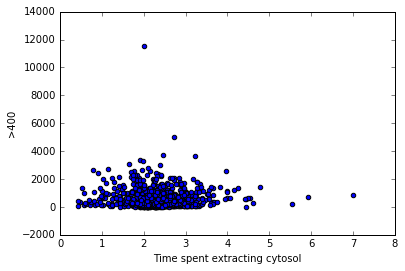

In [37]:
ps.plot(kind = "scatter", x = "Time spent extracting cytosol", y = ">400")